<a href="https://colab.research.google.com/github/sofia604/DEA113/blob/main/Midterm_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Get the titanic dataset from the seaborn library
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# 1. Calculate the percentage of missing values in each column.
missing_values = titanic.isnull().sum()
total_values = titanic.shape[0]
missing_percentage = (missing_values / total_values) * 100
print(missing_percentage)

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64


In [7]:
#2. Handle missing values if any are present by either filling or dropping them.
titanic['age'] = titanic['age'].fillna(titanic['age'].mean())
titanic['embarked'] = titanic['embarked'].fillna(titanic['embarked'].mode()[0])
titanic['embark_town'] = titanic['embark_town'].fillna(titanic['embark_town'].mode()[0])
#Since deck has a great number of missing values in the dataset we drop the column to keep the other records
titanic = titanic.drop('deck', axis=1)

In [11]:
#3. Generate summary statistics for both numerical and categorical columns.
titanic.dtypes

,0
survived,int64
pclass,int64
sex,object
age,float64
sibsp,int64
parch,int64
fare,float64
embarked,object
class,category
who,object


In [12]:
#Statistic summary of numerical columns
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
# Statistics summary for categorical columns
categorical_cols = titanic.select_dtypes(exclude=np.number).columns
categorical = titanic[categorical_cols]
categorical.describe(include='all')

,sex,embarked,class,who,adult_male,embark_town,alive,alone
count,891,891,891,891,891,891,891,891
unique,2,3,3,3,2,3,2,2
top,male,S,Third,man,True,Southampton,no,True
freq,577,646,491,537,537,646,549,537


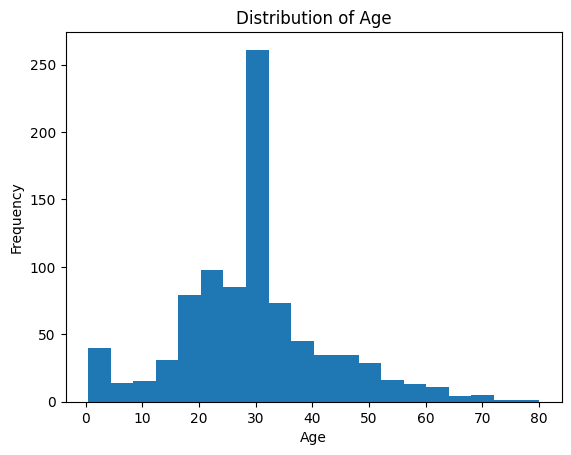

In [17]:
#4 Plot a histogram to observe the distribution of the age column.
plt.hist(titanic['age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

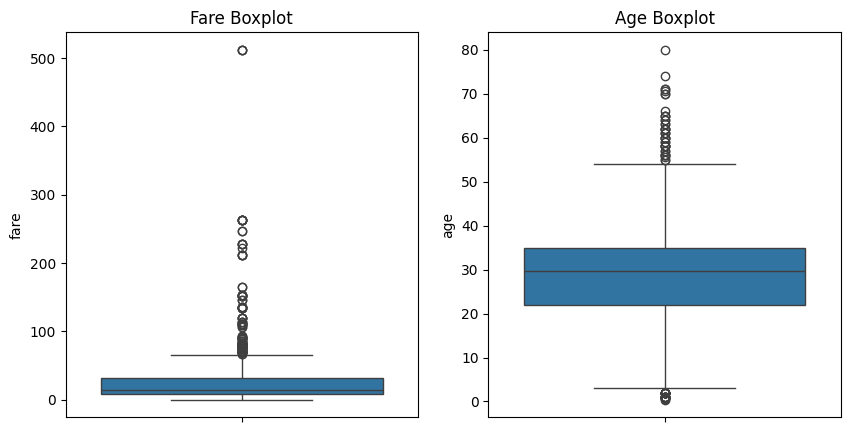

In [19]:
#5 Use a boxplot to identify outliers in the fare and age columns
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=titanic['fare'])
plt.title('Fare Boxplot')
plt.subplot(1, 2, 2)
sns.boxplot(y=titanic['age'])
plt.title('Age Boxplot')
plt.show()

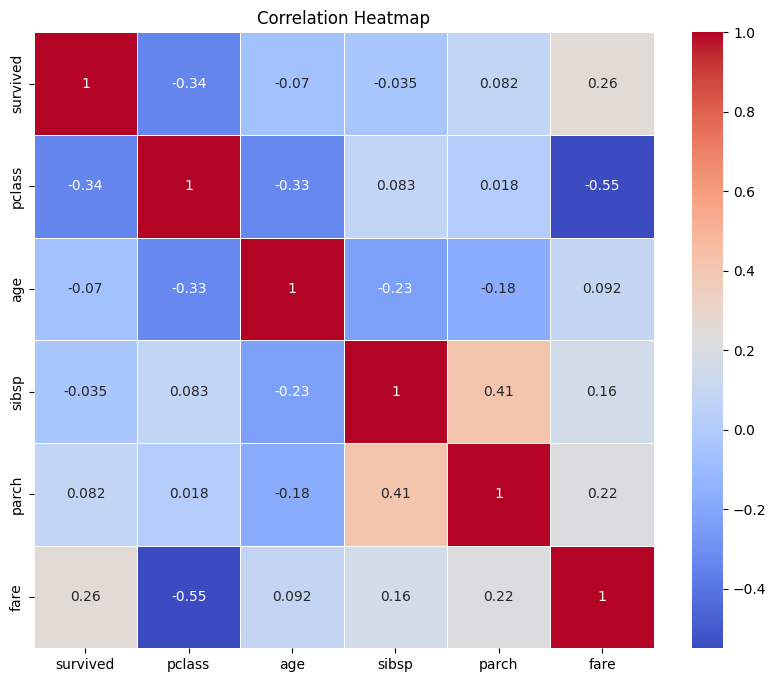

In [21]:
#6 Calculate and visualize the correlation between numerical columns using a heatmap
numerical_cols = titanic.select_dtypes(include=np.number).columns
numerical = titanic[numerical_cols]
correlation_matrix = numerical.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [24]:
#Find the average fare for each class and compare across categories.
average_fare_by_class = titanic.groupby('class')['fare'].mean()
average_fare_by_class.reset_index()

<ipython-input-24-c7d86ed4ad0c>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_fare_by_class = titanic.groupby('class')['fare'].mean()


,class,fare
0,First,84.154687
1,Second,20.662183
2,Third,13.675550


<Axes: xlabel='age', ylabel='fare'>

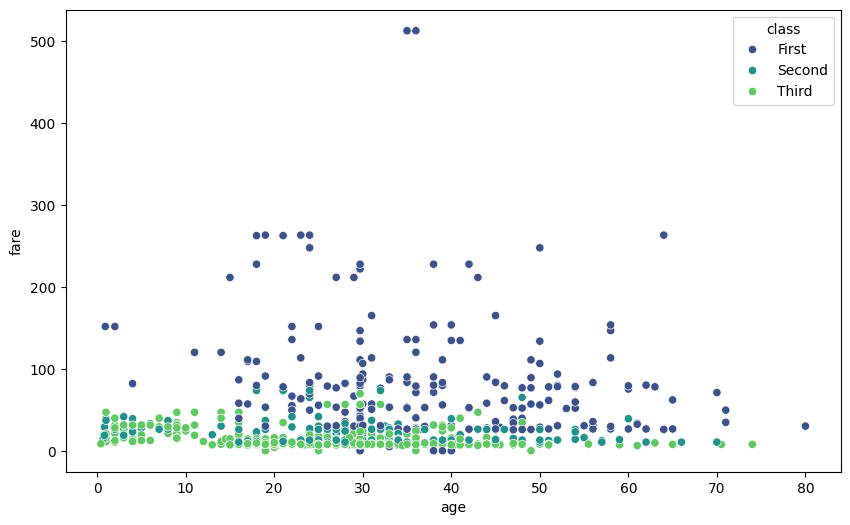

In [25]:
#8 Create a scatter plot to visualize the relationship between fare and age.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=titanic, x='age', y='fare', hue='class', palette='viridis')